<font size = 6><b> PFE </b></font>

Adds

--

<font size = 4><b> Imports</b></font>

--

In [1]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


<font size = 4><b> Transfer between videos </b></font>

--

In [99]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

source = listeVideo[21]

r2_learning_double = []
for aux in listeVideo:
    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,8):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_double.append(r2)

    
r2_learning_simple = []
for aux in listeVideo:
    x = np.asarray(aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,8):
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)






# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_simple = pandas.DataFrame(data=r2_learning_simple)
# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_double = pandas.DataFrame(data=r2_learning_double)

Learning on the video target + on the video source

In [100]:
import pandas as pd

lab = np.array(('H264','no_8x8dct','no_asm','no_cabac','no_deblock',
            'no_fast_pskip','no_mbtree','no_mixed_refs',
            'no_weightb','rc_lookahead','ref','usertime','systemtime','elapsedtime'))

labsource = []
labtarget = []
for j in range(len(lab)):
    labj = lab[j]
    labsource.append(labj+"source")
    if j != len(lab)-1:
        labtarget.append(labj+"target")
    
x1 = pd.DataFrame(source[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
            'no_fast_pskip','no_mbtree','no_mixed_refs',
            'no_weightb','rc_lookahead','ref','usertime','systemtime','elapsedtime']])
x1.columns = labsource


r2_learning_transfer = []
for aux in listeVideo:
    x2 = pd.DataFrame(aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
            'no_fast_pskip','no_mbtree','no_mixed_refs',
            'no_weightb','rc_lookahead','ref','usertime','systemtime']])
    x2.columns = labtarget

    x = pd.merge(x1, x2,left_index=True, right_index=True, how='inner')
    
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,8):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_transfer.append(r2)
    
# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_transfer = pandas.DataFrame(data=r2_learning_transfer)

<font size = 4><b> Curves of r2_score of prevision in fonction of the training dataset length</b></font>

--

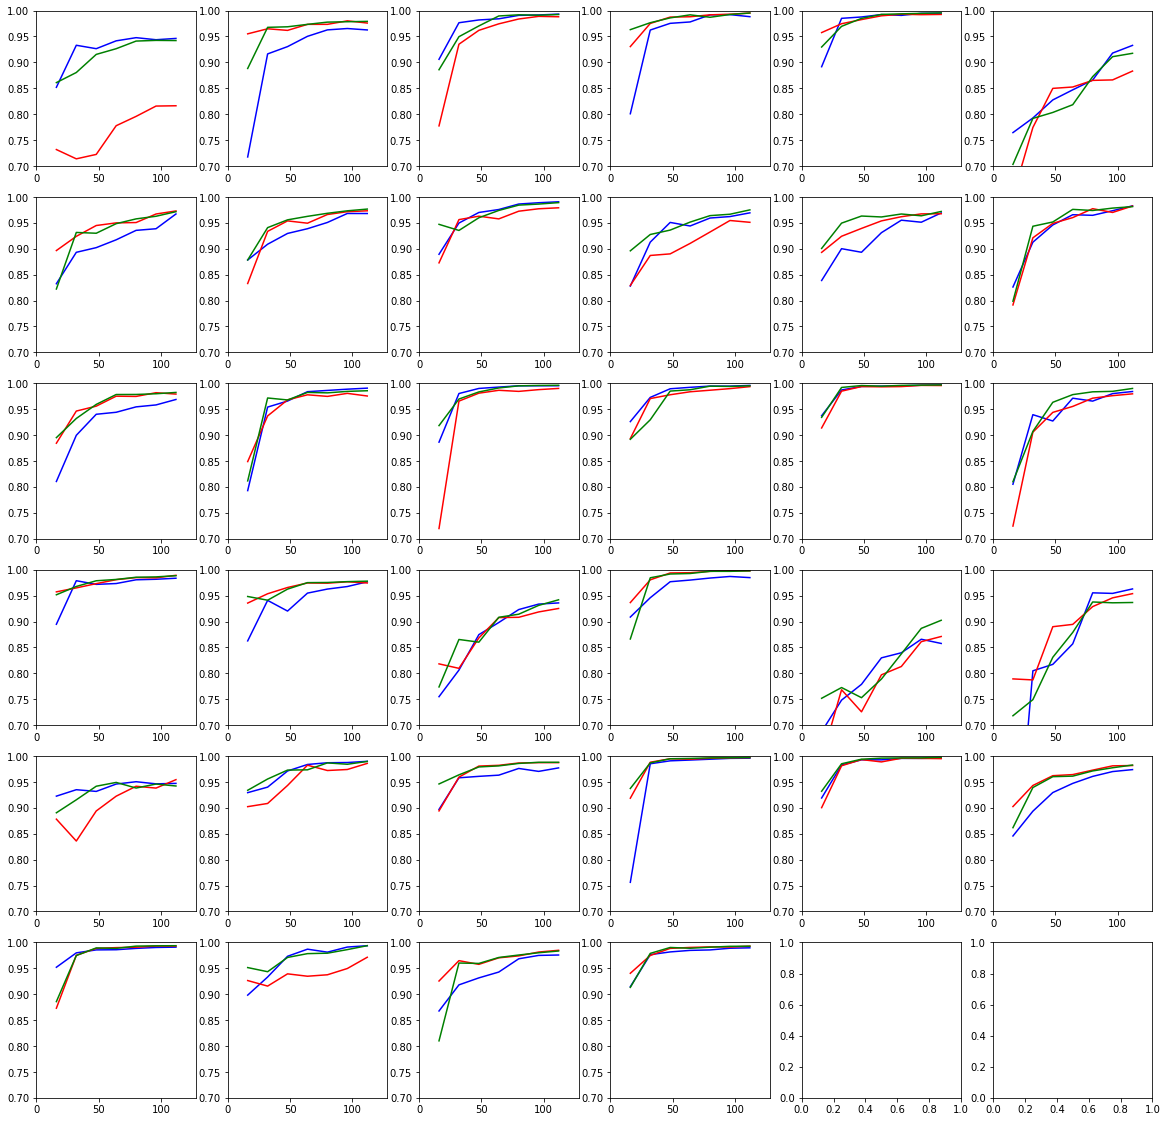

In [103]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_double[taille*i+j:taille*i+j+1])
        x3=np.asarray(data_transfer[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,128,0.7,1])
            plt.plot(range(16,128,16),x1[0],c="blue")
            plt.plot(range(16,128,16),x2[0],c="red")
            plt.plot(range(16,128,16),x3[0],c="green")
plt.show()

All the test are made on the target
- Red : tranfer (training on the source)
- Green : transfer + learning (training on source+target)
- Blue : learning (training on target only)

In [114]:
video = []
for i in range(len(listeVideo)):
    labTemps = 'temps_'+str(i)
    vid[labTemps] = listeVideo[i]['elapsedtime']

r2_full_temps = []
for indice in range(len(listeVideo)):
    
    x = pd.DataFrame(vid.drop('temps_'+str(i),axis=1))
    y = np.ravel(vid['temps_'+str(i)])

    r2 = []
    for i in range(1,8):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_full_temps.append(r2)
    
data_full_temps = pandas.DataFrame(data=r2_full_temps)

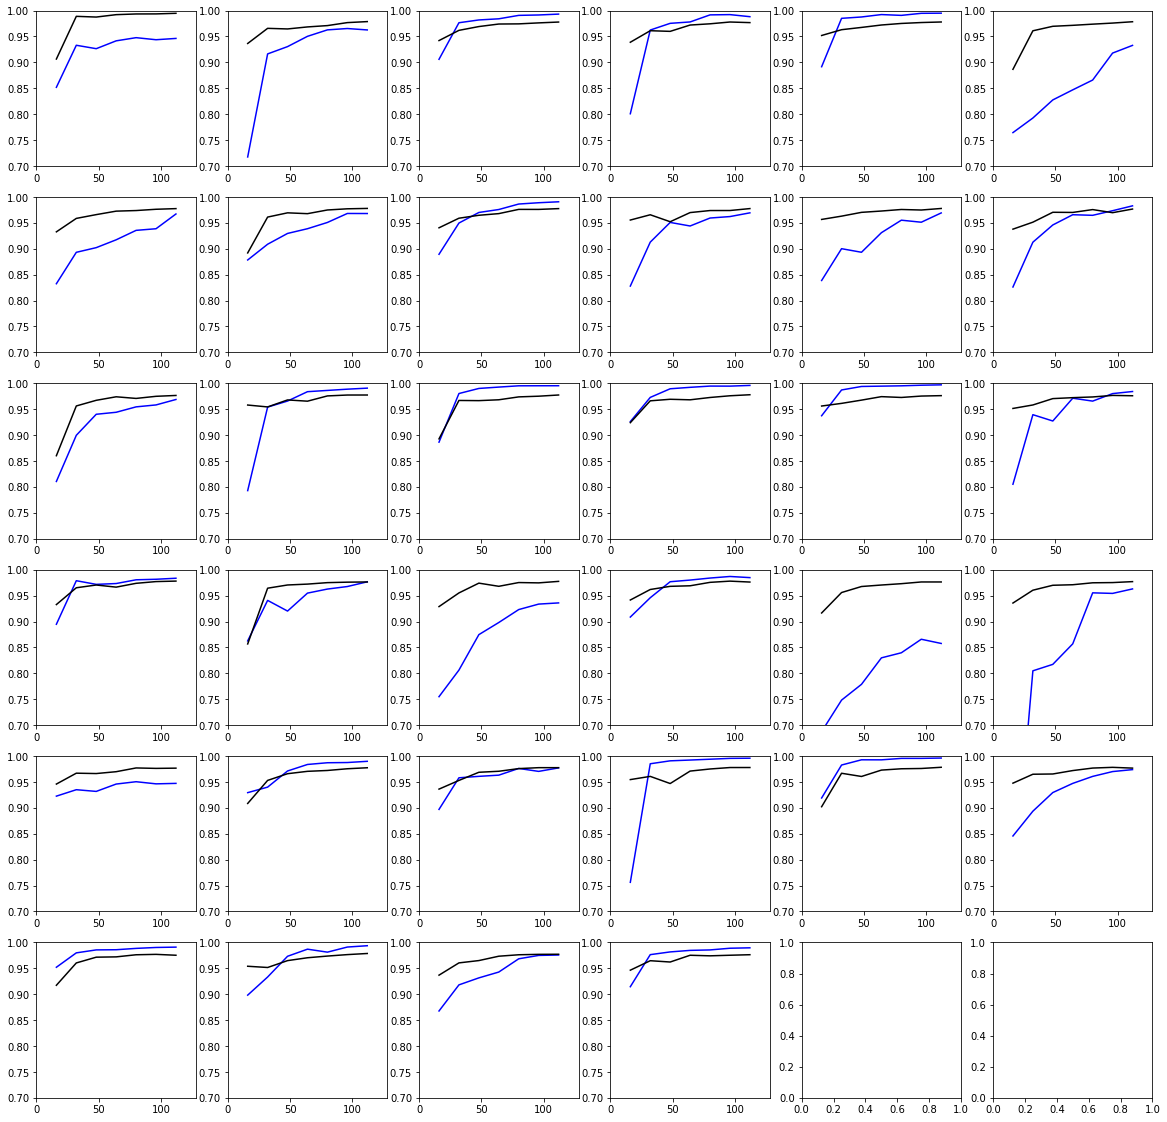

In [116]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x4=np.asarray(data_full_temps[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,128,0.7,1])
            plt.plot(range(16,128,16),x1[0],c="blue")
            plt.plot(range(16,128,16),x4[0],c="black")
plt.show()